In [1]:
#importing packages
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
#Reading train test
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
test.describe

<bound method NDFrame.describe of           id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]>

In [6]:
train.describe

<bound method NDFrame.describe of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [7]:
#putting train and test together
combi = train.append(test, ignore_index=True)

In [8]:
#function to remove unwanted text patterns from the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [9]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [10]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
#removing small words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
combi.tail()

,id,label,tweet,tidy_tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",song glad free download #shoegaze #newmusic #n...


In [14]:
combi.describe

<bound method NDFrame.describe of           id  label                                              tweet  \
0          1    0.0   @user when a father is dysfunctional and is s...   
1          2    0.0  @user @user thanks for #lyft credit i can't us...   
2          3    0.0                                bihday your majesty   
3          4    0.0  #model   i love u take with u all the time in ...   
4          5    0.0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
49154  49155    NaN  thought factory: left-right polarisation! #tru...   
49155  49156    NaN  feeling like a mermaid ð #hairflip #neverre...   
49156  49157    NaN  #hillary #campaigned today in #ohio((omg)) &am...   
49157  49158    NaN  happy, at work conference: right mindset leads...   
49158  49159    NaN  my   song "so glad" free download!  #shoegaze ...   

                                              tidy_tweet  
0      when father

In [15]:
combi.reset_index()

,index,id,label,tweet,tidy_tweet
0,0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,2,3,0.0,bihday your majesty,bihday your majesty
3,3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...,...
49154,49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
49157,49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


In [16]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [17]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

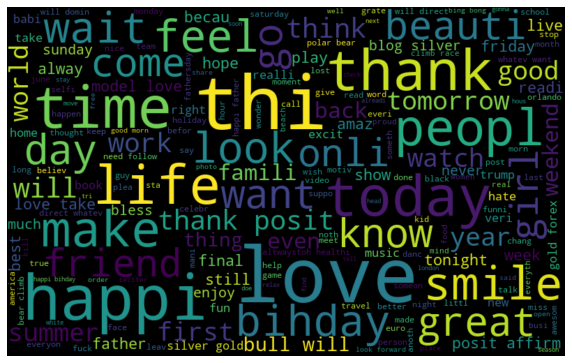

In [19]:
#Understanding tweets
#word cloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

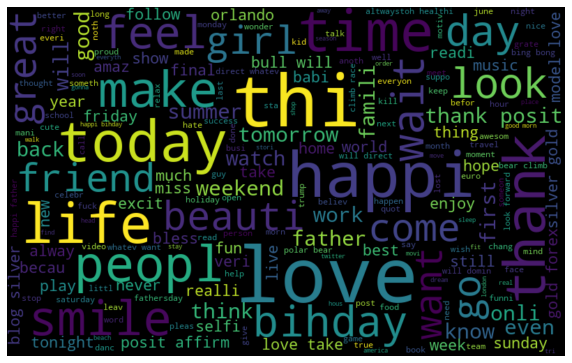

In [20]:
#words in non- racist tweets
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

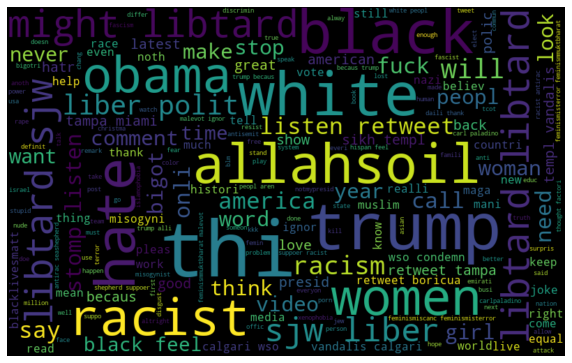

In [21]:
# words in racist tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
#understanding hashtags present in tweets
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

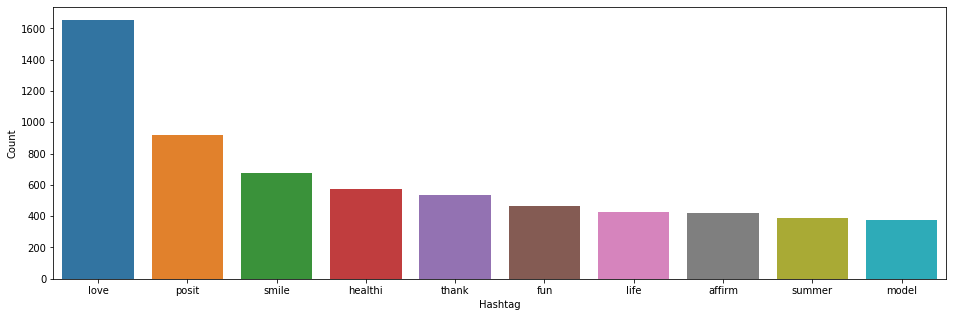

In [24]:
# non racist
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

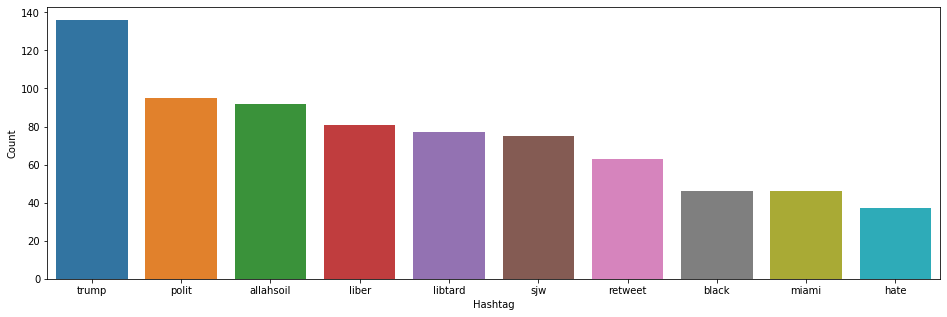

In [25]:
# racist
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [33]:
#most of the terms are negative With a few neutral terms As well. So, it’s Not a bad idea to keep these hashtags In our data As they contain useful information.

In [30]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [34]:
print(bow)

  (0, 302)	1
  (0, 463)	1
  (0, 738)	1
  (1, 879)	1
  (1, 131)	1
  (1, 600)	1
  (2, 79)	1
  (3, 557)	1
  (3, 518)	1
  (3, 888)	1
  (4, 566)	1
  (5, 423)	1
  (5, 858)	1
  (5, 69)	1
  (5, 485)	1
  (6, 121)	1
  (6, 894)	1
  (7, 749)	2
  (7, 992)	2
  (7, 283)	2
  (7, 883)	1
  (7, 393)	1
  (7, 432)	1
  (7, 353)	1
  (8, 518)	1
  :	:
  (49154, 87)	1
  (49155, 498)	1
  (49155, 307)	1
  (49155, 961)	1
  (49155, 246)	1
  (49156, 891)	1
  (49156, 498)	1
  (49156, 605)	1
  (49156, 980)	2
  (49156, 929)	1
  (49156, 411)	1
  (49156, 122)	1
  (49157, 389)	1
  (49157, 981)	2
  (49157, 175)	1
  (49157, 728)	1
  (49157, 553)	2
  (49157, 480)	1
  (49157, 198)	1
  (49157, 226)	1
  (49157, 612)	1
  (49158, 333)	1
  (49158, 799)	1
  (49158, 243)	1
  (49158, 356)	1


In [36]:
#TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

#Let’s have a look at the important terms related to TF-IDF:

#TF = (Number of times term t appears in a document)/(Number of terms in the document) IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. TF-IDF = TF*IDF


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [38]:
#BOW model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score



0.5303408146300915

In [39]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file


In [40]:
#TAF-IDF model
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)


0.5451327433628319